<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220527.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **06. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷**

#### **a. 규제 선형 모델의 개요**
  - 좋은 회귀 모델은, 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.
  - 따라서, 비용 함수는 RSS 최소화 방법과 회귀 계수 값이 커지지 않는 방법이 서로 균형을 이루어야 한다.
$$비용 함수 목표 = Min(RSS(W) + alpha *∥W∥_{2}^2)$$
    - alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기를 제어하는 튜닝 파라미터
    - alpha를 0에서부터 지속적으로 값을 증가시키면, 회귀 계수 값을 크기를 감소시킬 수 있다.
  - 이처럼 비용 함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regularization)라고 부른다.
    - `L2 규제` : `W의 제곱에 페널티를 부여`하는 방식
      - `릿지(Ridge) 회귀`
    - `L1 규제` : `W의 절댓값에 대해 페널티를 부여`하는 방식으로, 영향력이 크지 않은 회귀 계수 값을 0으로 변환
      - `라쏘(Lasso) 회귀`



#### **b. 릿지 회귀**
  - `Ridge 클래스`를 이용해 릿지 회귀를 구현
    - 주요 생성 파라미터는 `alpha`로, 이는 릿지 회귀의 alpha `L2 규제 계수`에 해당한다.

> 보스턴 주택 가격을 Ridge 클래스를 이용해 다시 예측하고, 예측 성능을 cross_val_score()로 평가해보자.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이터 셋 로드
boston = load_boston()

# boston 데이터 셋을 DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston dataset의 target 배열은 주택 가격
# 이를 PRICE 칼럼으로 DataFrame에 추가
bostonDF['PRICE'] = boston.target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print(' 5 folds의 개별 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
 5 folds의 개별 평균 RMSE: 5.518


  - `릿지`의 5개 폴드 세트의 `평균 RMSE`가 `5.518`이다. 앞 예제의 규제가 없는 `LinearRegression의 RMSE 평균`인 `5.829`보다 더 뛰어난 예측 성능을 보인다.

> 이번에는 릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴보자. alpha 값을 변화하면서 RMSE 값과 각 피처의 회귀 계수를 시각화하고, DataFrame에 저장한다.

In [3]:
# 릿지에 사용될 alpha 파라미터의 값을 정리
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
  ridge = Ridge(alpha = alpha)

  # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
  avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
  print('alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


  - `alpha = 100`일 때, 평균 RMSE가 `5.330`으로 가장 좋다. 

> 이번에는 alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화해보자. 

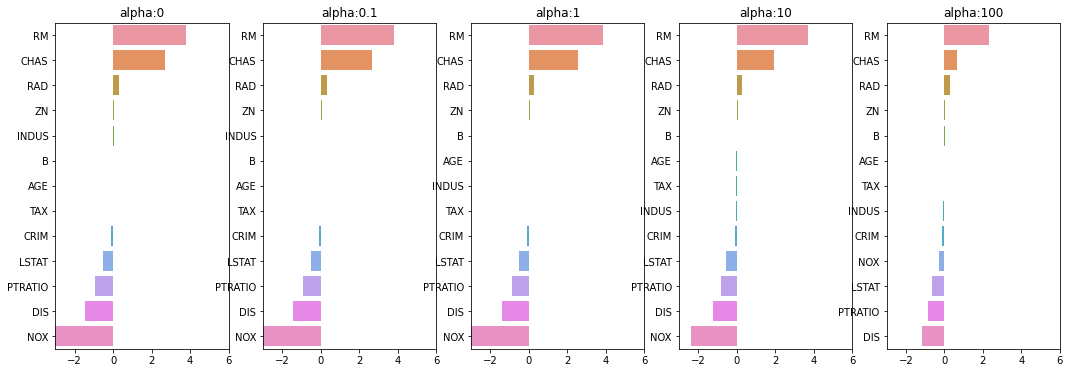

In [4]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
  colname = 'alpha:'+str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수 값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending = False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

# for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

  - alpha 값을 계속 증가시킬수록, 회귀 계수 값은 지속적으로 작아진다. 특히 NOX 피처의 경우, alpha 값을 계속 증가시킴에 따라 회귀 계수가 크게 작아지고 있다.

> DataFrame에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값을 구해보자.

In [5]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


  - alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음을 알 수 있다. 하지만 릿지 회귀의 경우, 회귀 계수를 0으로 만들지는 않는다.

#### **c. 라쏘 회귀**
  - W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 모델
$$비용 함수 목표 = Min(RSS(W) + alpha * ∥W∥_{1})$$
  - L2 규제가 회귀 계수를 감소시키는 반면, L1 규제는 불필요한 회귀 계수를 0으로 만들고 제거한다.
  - `Lasso 클래스`를 이용해 라쏘 회귀를 구현
    - 주요 생성 파라미터는 `alpha`로, 이는 릿지 회귀의 alpha `L1 규제 계수`에 해당한다.

In [6]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha = param)
        elif model_name =='Lasso': model = Lasso(alpha = param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha = param, l1_ratio = 0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = "neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data = model.coef_ , index = X_data_n.columns )
            colname ='alpha : ' + str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [7]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고, get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189 


  - `alpha = 0.07`일 때 `가장 좋은 평균 RMSE`를 보여준다. 앞의 릿지 평균 5.518보다는 약간 떨어지는 수치지만, LinearRegression 평균인 5.829보다는 향상되었다. 

In [8]:
# 반환된 coeff_lasso_df를 첫번째 Column 순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha : '+ str(lasso_alphas[0])
coeff_lasso_df.sort_values(by = sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


  - alpha가 증가함에 따라 일부 피처의 회귀 계수는 아예 0이 된다. NOX 속성은 alpha = 0.07일 때부터 회귀 계수가 0이며, alpha를 증가시키면서 INDUS, CHAS와 같은 속성의 회귀 계수가 0으로 바뀐다.

#### **d. 엘라스틱넷 회귀**
  - `L2 규제와 L1 규제를 결합`한 회귀
$$비용 함수 목표 = Min(RSS(W) + alpha2 * ∥W∥_{2}^2 + alpha1 * ∥W∥_{1})$$
  - 라쏘 회귀가 회귀 계수를 0으로 만드는 성향이 강한데, 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것이다. 
  - 단점 : 수행시간이 상대적으로 오래 걸린다.
  - `ElasticNet`으로 엘라스틱넷을 구현
    - 주요 생성 파라미터 : alpha, l1_ratio
      - `엘라스틱넷의 규제`를 `a*L1 + b*L2`로 정의할 때, 
        - `alpha` : `a+b`
        - `l1_ratio` : `a / (a+b)`


In [9]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.068 


  - alpha = 0.5일 때 RMSE가 5.467로 가장 좋은 예측 성능을 보인다.

In [10]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha : ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by = sort_column, ascending = False)

,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


  - alpha 값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.

#### **e. 선형 회귀 모델을 위한 데이터 변환**
  - 선형 회귀 모델은 피처값과 타깃값의 분포가 정규 분포인 것을 매우 선호한다.
    - 특히 타깃값의 경우, 분포가 치우친 왜곡된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미친다.
  - 따라서 선형 회귀 모델을 적용하기 전, 먼저 데이터에 대한 스케일링 / 정규화 작업을 수행하는 것이 일반적이다. 
    - 피처 데이터 세트
      - 1. StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포랄 가진 데이터 세트로 변환, MinMaxScaler 클래스를 이용해 최솟값이 0이고 최댓값이 1인 값으로 정규화를 수행한다.
      - 2. 스케일링 / 정규화를 수행한 데이터 세트에 다시 다항 특성을 적용하여 변환한다.
      - 3. 원래 값에 log 함수를 적용하여 정규 분포에 가까운 형태로 값이 분포되게 한다. 실제 선형 회귀에서 로그 변환이 가장 많이 사용된다.

    - 타깃 데이터 세트
      - 일반적으로 로그 변환을 적용한다. 

In [11]:
# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2 이상 부여하지 않음
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method = 'None', p_degree = None, input_data = None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)

  return scaled_data

> 이제 Ridge 클래스의 alpha 값을 변화시키면서 피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력 받을 경우, RMSE 값이 어떻게 변하는지 살펴보자. 

In [12]:
# Ridge의 alpha 값을 다르게 적용하고, 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규분포, 표준정규분포 + 다항식 특성
# 최대/최소 정규화, 최대/최소 정규화 + 다항식 특성, 로그 변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), 
                ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1],
                                  input_data = X_data)
  print('\n## 변환 유형: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False, return_coeff = False)


## 변환 유형: None, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE : 5.330 

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE : 5.421 

## 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE : 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE : 4.634 

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE : 7.635 

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE : 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE : 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE : 6.538 

## 변환 유형: Log, Polynomi

  - 표준 정규 분포와 최솟값/최댓값 정규화로 피처 데이터 세트를 변경해도 성능상의 개선은 없다. 반면 로그 변환을 보면 alpha가 0.1, 1, 10인 경우에 모두 좋은 성능 향상이 있음을 알 수 있다.

---

### **07. 로지스틱 회귀**
  - 선형 회귀 방식을 분류에 적용한 알고리즘
  - 시그모이드(Sigmoid) 함수의 최적선을 찾고, 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정
$$sigmoid = y = \frac {1} {1 + e^{-x}}$$
  - y값은 항상 0과 1 사이의 값을 반환
  - 로지스틱 회귀는 이처럼 선형 회귀 방식을 기반으로 하되, 시그모이드 함수를 이용해 분류를 수행하는 회귀이다.


> 이제 위스콘신 유방암 데이터 세트를 이용해 로지스틱 회귀로 암 여부를 판단해보자.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균 0, 분산 1로 피처 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

> 이제 로지스틱 회귀를 이용해 학습 및 예측을 수행하고, 정확도와 ROC-AUC 값을 구해보자.

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# 정확도와 ROC-AUC 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {0:.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


  - 정확도는 약 0.977, ROC-AUC가 약 0.972이다.

> GridSearchCV를 이용해 위스콘신 데이터 세트에서 penalty, C 하이퍼 파라미터를 최적화해보자.

In [16]:
from sklearn.model_selection import GridSearchCV

params = { 'penalty' : ['l2', 'l1'],
          'C' : [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

  - 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어나다. 이 때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많다. 또한, 로지스틱 회귀는 희소한 데이터 세트 분류에도 뛰어난 성능을 보여 텍스트 분류에서도 자주 사용된다.

---

### **08. 회귀 트리**
  - `리프 노드에 속한 데이터 값의 평균값`을 구해 `회귀 예측값을 계산`하는 방식
  - 결정 트리, 랜덤 포레스트, GBM, XGBoost, LightGBM을 수행할 수 있는 Estimator 제공
    - Decision Tree : DecisionTreeRegressor / DecisionTreeClassifier
    - Gradient Boosting : GradientBoostingRegressor / GradientBoostingClassifier
    - XGBoost : XGBRegressor / XGBClassifier
    - LightGBM : LGBMRegressor / LGBMClassifier

> 사이킷런의 랜덤 포레스트 회귀 트리인 RandomForestRegressor를 이용해 앞의 선형 회귀에서 다룬 보스턴 주택 가격 예측을 수행해보자.

In [17]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

 5 교차 검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423


> 이번에는 결정 트리, GBM, XGBoost, LightGBM의 Regressor를 모두 이용해 보스턴 주택 가격 예측을 수행해보자. 

In [18]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('#####', model.__class__.__name__, '#####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
 5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
 5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor #####
 5 교차 검증의 평균 RMSE : 4.269
[02:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
 5 교차 검증의 평균 RMSE : 4.089
##### LGBMRegressor #####
 5 교차 검증의 평균 RMSE : 4.646


  - XGBoost의 평균 RMSE가 4.089로 성능이 가장 좋다.

> feature_importances_를 이용해 보스턴 주택 가격 모델의 피처별 중요도를 시각화해보자.

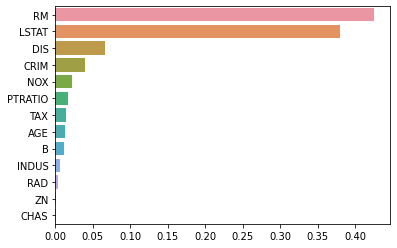

In [20]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

  - RM과 LSTAT이 주택 가격에 영향을 미치는 가장 중요한 변수이다.

> 이번에는 회귀 트리 Regressor가 어떻게 예측값을 판단하는지 선형 회귀와 비교해 시각화해보자. 결정 트리의 하이퍼 파라미터인 max_depth의 크기를 변화시키면서 어떻게 회귀 트리 예측선이 변화하는지 살펴보자.

(100, 2)


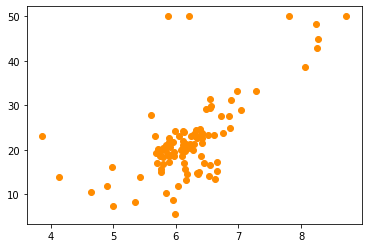

In [23]:
# RM고 PRICE 칼럼만 추출
bostonDF_sample = bostonDF[['RM', 'PRICE']]
# 보스턴 데이터 세트의 개수를 100개만 샘플링
bostonDF_sample = bostonDF_sample.sample(n = 100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')

> 다음으로 데이터 세트에 대해 LinearRegression과 DecisionTreeRegressor를 max_depth를 각각 2, 7로 해서 학습해보자. 이렇게 학습된 Regressor에 RM 값을 4.5~8.5까지의 100개의 테스트 데이터 세트로 제공했을 때 예측값을 구해보자.

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5 ~ 8.5까지의 100개 데이터 세트로 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터만 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

> LinearRegression과 DecisionTreeRegressor의 max_depth를 각각 2, 7로 해서 학습된 Regressor에서 예측한 Price 회귀선을 그려보자.

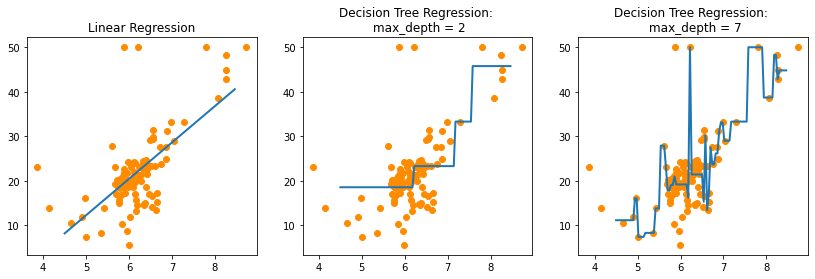

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14, 4), ncols = 3)

# X축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax2.plot(X_test, pred_rf2, label = 'max_depth : 2', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax3.plot(X_test, pred_rf7, label = 'max_depth : 7', linewidth = 2)

  - 선형 회귀는 직선으로 예측 회귀선을 표현하는 데 반해, 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. DecisionTreeRegressor의 max_depth = 7인 경우에는 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.